<a href="https://colab.research.google.com/github/amritanshu009/DSAexperiments/blob/main/logistic_regression_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
# upgrade sklearn

!pip install scikit-learn --upgrade

In [ ]:
!pip install mlflow

In [ ]:
!pip install dagshub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.2/203.2 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: graphql-core
    Found existing installation: graphql-core 3.2.6
    Uninstalling graphql-core-3.2.6:
      Successfully uninstalled graphql-core-3.2.6


In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import mlflow
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import json
import joblib
import os
import yaml
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [ ]:
import sklearn

sklearn.__version__

'1.6.1'

In [ ]:
# load the data

DATA_PATH = "/kaggle/input/twitter-and-reddit-sentimental-analysis-dataset/Reddit_Data.csv"

df = pd.read_csv(DATA_PATH)

df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/twitter-and-reddit-sentimental-analysis-dataset/Reddit_Data.csv'

In [ ]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv("Reddit_Data.csv")  # Uses the uploaded file
df.head()


Saving Reddit_Data.csv to Reddit_Data (1).csv


,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [ ]:
df.shape

(37249, 2)

In [ ]:
df.rename({"clean_comment":"comment",
           "category":"sentiment"},axis=1,inplace=True)

In [ ]:
(
    df.isna().sum()
)

,0
comment,100
sentiment,0


In [ ]:
(
    df.loc[
        df['comment'].isna()
    ]
)

,comment,sentiment
413,NaN,0
605,NaN,0
2422,NaN,0
2877,NaN,0
3307,NaN,0
...,...,...
35975,NaN,0
36036,NaN,0
37043,NaN,0
37111,NaN,0


In [ ]:
(
    df.loc[
        df['comment'].isna(),"sentiment"
    ]
    .value_counts()
)

,count
sentiment,
0,100


In [ ]:
# remove missing values

print("Rows in data before removing missing values ",df.shape[0])

df = df.dropna()

print("Rows in data after removing missing values ",df.shape[0])

Rows in data before removing missing values  37249
Rows in data after removing missing values  37149


In [ ]:
df['comment'].duplicated().sum()

np.int64(350)

In [ ]:
print("Rows in data before removing duplicate rows ",df.shape[0])

df = df.drop_duplicates(subset=['comment'])

print("Rows in data after removing duplicate rows ",df.shape[0])

Rows in data before removing duplicate rows  37149
Rows in data after removing duplicate rows  36799


<Axes: xlabel='sentiment'>

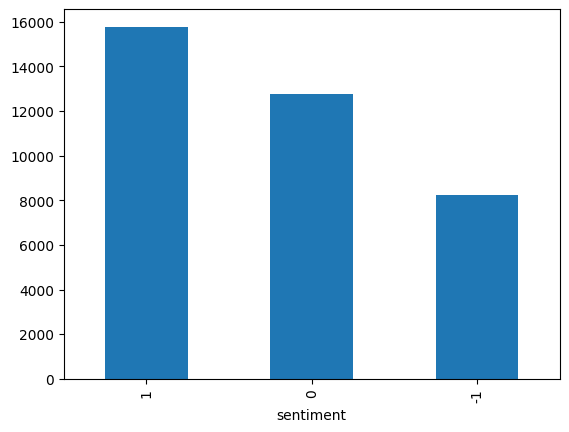

In [ ]:

(
    df['sentiment']
    .value_counts()
    .plot(kind='bar')
)

In [ ]:
# remove whitespaces

df['comment'] = df['comment'].str.lstrip()

In [ ]:
def count_words(text):
    return len(text.split(" "))

In [ ]:
df['word_count'] = df['comment'].apply(count_words)

In [ ]:
# statistics on word_count

df['word_count'].agg(['min','max','mean'])

,word_count
min,1.000000
max,1308.000000
mean,30.470285


In [ ]:
# convert all the sentences to lowercase

df['comment'] = df['comment'].str.lower()

In [ ]:
def removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )
    return text

def removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)


In [ ]:
df['comment'].head()

,comment
0,family mormon have never tried explain them th...
1,buddhism has very much lot compatible with chr...
2,seriously don say thing first all they won get...
3,what you have learned yours and only yours wha...
4,for your own benefit you may want read living ...


In [ ]:
def preprocess_text(text):
    text = removing_numbers(text)
    text = removing_urls(text)
    text = removing_punctuations(text)

    return text

df['comment'] = df['comment'].apply(preprocess_text)

In [ ]:
# remove stopwords from comments

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    return " ".join(filtered_sentence)

df['comment'] = df['comment'].apply(remove_stopwords)

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# lemmatize the text

# lemmatizer to be used instead. not working in kaggle.

def stemming(text):
    stemmer = PorterStemmer()
    text = [stemmer.stem(word) for word in text.split(" ")]
    return " ".join(text)

df['comment'] = df['comment'].apply(stemming)

In [ ]:
# make X and y

X = df.drop(columns='sentiment')
y = df['sentiment']

X

,comment,word_count
0,famili mormon never tri explain still stare pu...,40
1,buddhism much lot compat christian especi cons...,197
2,serious say thing first get complex explain no...,87
3,learn want teach differ focu goal wrap paper b...,30
4,benefit may want read live buddha live christ ...,113
...,...,...
37244,jesu,1
37245,kya bhai pure saal chutiya banaya modi aur jab...,19
37246,downvot karna tha par upvot hogaya,7
37247,haha nice,3


In [ ]:
# train test split the data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=True,stratify=y)

print("The shape of X_train is",X_train.shape)
print("The shape of X_test is",X_test.shape)

The shape of X_train is (29439, 2)
The shape of X_test is (7360, 2)


Text(0.5, 1.0, 'Test Data')

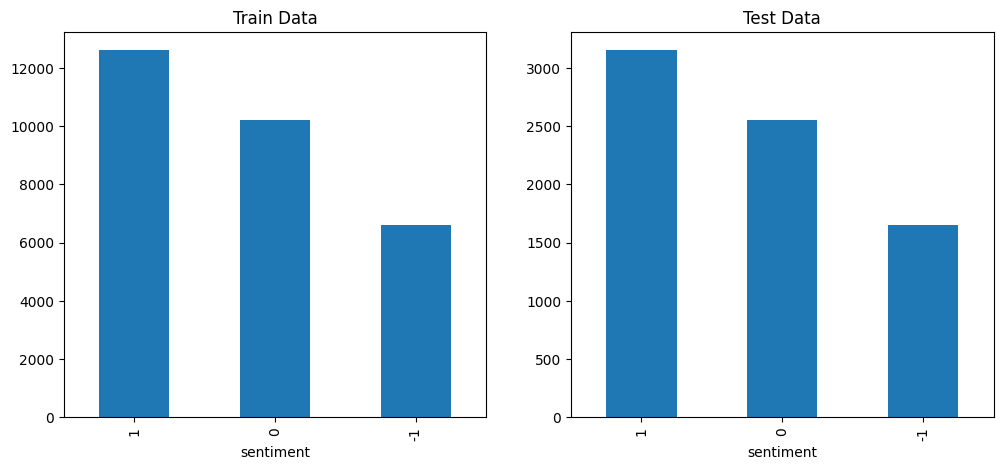

In [ ]:
# plot the two graphs

fig = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
y_train.value_counts().plot(kind='bar')
plt.title("Train Data")

plt.subplot(1,2,2)
y_test.value_counts().plot(kind='bar')
plt.title("Test Data")

In [ ]:
sklearn.set_config(transform_output='default')

In [ ]:
# transform the output variable
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
# form the preprocessor

preprocessor = ColumnTransformer(transformers=[
    ('encode',CountVectorizer(decode_error='ignore'),'comment'),
    ('scale',StandardScaler(),['word_count'])
],n_jobs=-1)

preprocessor

ColumnTransformer(n_jobs=-1,
                  transformers=[('encode',
                                 CountVectorizer(decode_error='ignore'),
                                 'comment'),
                                ('scale', StandardScaler(), ['word_count'])])

In [ ]:
preprocessor.fit_transform(X_train.sample(20)).toarray()

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.1816056 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.61399988],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.74371816],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.74371816],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.35456331],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.13836617]])

In [ ]:
# form the model building pipeline

model_pipe = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('clf',None)
])

In [ ]:
# list of preprocessors

preprocessors = [CountVectorizer(decode_error='ignore'),TfidfVectorizer(decode_error='ignore')]

# list of classifiers
classifiers = [LogisticRegression(max_iter=1000),
               SVC(),
               RandomForestClassifier(),
               GradientBoostingClassifier(),
               XGBClassifier(objective="multi:softmax",num_class=3),
               LGBMClassifier()]

In [ ]:
# params grid

params_grid = {
    "preprocessor__encode": preprocessors,
    "clf": classifiers
}

search = GridSearchCV(model_pipe,params_grid,
                      scoring='accuracy',n_jobs=-1,
                     cv=3,verbose=3)

search

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('encode',
                                                                         CountVectorizer(decode_error='ignore'),
                                                                         'comment'),
                                                                        ('scale',
                                                                         StandardScaler(),
                                                                         ['word_count'])])),
                                       ('clf', None)]),
             n_jobs=-1,
             param_grid={'clf': [LogisticRegression(max_iter=1000), SVC(),
                                 RandomForestClassifier(),
                                 GradientBoostingClassifier(),
                                 XGBCl...
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_class=3,
                                               num_parallel_tree=None, ...),
                                 LGBMClassifier()],
                         'preprocessor__encode': [CountVectorizer(decode_error='ignore'),
                                                  TfidfVectorizer(decode_error='ignore')]},
             scoring='accuracy', verbose=3)

In [ ]:
# fit the grid search

search.fit(X_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.043808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12966
[LightGBM] [Info] Number of data points in the train set: 29439, number of used features: 3277
[LightGBM] [Info] Start training from score -1.495251
[LightGBM] [Info] Start training from score -1.057778
[LightGBM] [Info] Start training from score -0.847275


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=-1,
                                                          transformers=[('encode',
                                                                         CountVectorizer(decode_error='ignore'),
                                                                         'comment'),
                                                                        ('scale',
                                                                         StandardScaler(),
                                                                         ['word_count'])])),
                                       ('clf', None)]),
             n_jobs=-1,
             param_grid={'clf': [LogisticRegression(max_iter=1000), SVC(),
                                 RandomForestClassifier(),
                                 GradientBoostingClassifier(),
                                 XGBCl...
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=None, n_jobs=None,
                                               num_class=3,
                                               num_parallel_tree=None, ...),
                                 LGBMClassifier()],
                         'preprocessor__encode': [CountVectorizer(decode_error='ignore'),
                                                  TfidfVectorizer(decode_error='ignore')]},
             scoring='accuracy', verbose=3)

In [ ]:
# best score
search.best_score_

np.float64(0.8295458405516491)

In [ ]:
# best preprocessor-model combo
search.best_params_

{'clf': LGBMClassifier(),
 'preprocessor__encode': CountVectorizer(decode_error='ignore')}

In [ ]:
# cv results

pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_preprocessor__encode,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.255774,0.234939,0.482849,0.107296,LogisticRegression(max_iter=1000),CountVectorizer(decode_error='ignore'),"{'clf': LogisticRegression(max_iter=1000), 'pr...",0.815347,0.819729,0.821971,0.819016,0.002751,3
1,3.860270,0.214003,0.346844,0.010781,LogisticRegression(max_iter=1000),TfidfVectorizer(decode_error='ignore'),"{'clf': LogisticRegression(max_iter=1000), 'pr...",0.803934,0.803730,0.804035,0.803900,0.000127,4
2,130.448903,1.238380,38.566770,1.028458,SVC(),CountVectorizer(decode_error='ignore'),"{'clf': SVC(), 'preprocessor__encode': CountVe...",0.769082,0.764496,0.772547,0.768708,0.003297,9
3,173.382715,5.230965,38.662916,0.591820,SVC(),TfidfVectorizer(decode_error='ignore'),"{'clf': SVC(), 'preprocessor__encode': TfidfVe...",0.791705,0.797921,0.794354,0.794660,0.002547,7
4,116.461979,1.501936,2.194524,0.388449,RandomForestClassifier(),CountVectorizer(decode_error='ignore'),"{'clf': RandomForestClassifier(), 'preprocesso...",0.767451,0.784673,0.777846,0.776657,0.007081,8
5,103.754399,0.648929,2.945004,0.594665,RandomForestClassifier(),TfidfVectorizer(decode_error='ignore'),"{'clf': RandomForestClassifier(), 'preprocesso...",0.763171,0.771426,0.768674,0.767757,0.003432,10
6,42.922476,0.861161,0.398088,0.019171,GradientBoostingClassifier(),CountVectorizer(decode_error='ignore'),"{'clf': GradientBoostingClassifier(), 'preproc...",0.718333,0.718435,0.720880,0.719216,0.001178,12
7,87.821734,1.851653,0.408388,0.009812,GradientBoostingClassifier(),TfidfVectorizer(decode_error='ignore'),"{'clf': GradientBoostingClassifier(), 'preproc...",0.720269,0.718944,0.723938,0.721050,0.002112,11
8,30.708604,0.596272,0.647737,0.150603,"XGBClassifier(base_score=None, booster=None, c...",CountVectorizer(decode_error='ignore'),"{'clf': XGBClassifier(base_score=None, booster...",0.799246,0.800469,0.806175,0.801963,0.003020,5
9,94.857342,1.251799,0.573265,0.047958,"XGBClassifier(base_score=None, booster=None, c...",TfidfVectorizer(decode_error='ignore'),"{'clf': XGBClassifier(base_score=None, booster...",0.797106,0.796902,0.802405,0.798804,0.002547,6


In [ ]:
results = dict(search.cv_results_)

In [ ]:
# This line ONLY affects file saving, not model output
pd.DataFrame(results).to_csv("results.csv", index=False)


In [ ]:
import pickle as pkl

with open("results.pkl", 'wb') as res:
    pkl.dump(results, res)


In [ ]:
# best model

best_model = search.best_estimator_

In [ ]:
import os
import joblib

# Save in a local "models" folder
output_dir = 'models'
os.makedirs(output_dir, exist_ok=True)

joblib.dump(best_model, os.path.join(output_dir, "best_model.joblib"))


['models/best_model.joblib']

In [ ]:
# get the train and test predictions

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
print("The train accuracy score is: ",accuracy_score(y_train,y_pred_train))
print("The train f1 score is: ",f1_score(y_train,y_pred_train,average='macro'))

print("#"*50)

print("The test accuracy score is: ",accuracy_score(y_test,y_pred_test))
print("The test f1 score is: ",f1_score(y_test,y_pred_test,average='macro'))

The train accuracy score is:  0.8643635993070417
The train f1 score is:  0.8516197825600011
##################################################
The test accuracy score is:  0.8297554347826087
The test f1 score is:  0.8126445739662621


In [ ]:
# perform cross validation

score = cross_val_score(best_model,X_train,y_train,
                        cv=5,scoring='accuracy',
                        n_jobs=-1,verbose=2)
score

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.6s finished


array([0.83525815, 0.83831522, 0.83101223, 0.84086277, 0.83183285])

In [ ]:
print(f"The avg cross val score is {score.mean():.4f}")

The avg cross val score is 0.8355


In [ ]:
def preprocess_manual_comment(comment):
    # Clean and process the input just like training
    comment = comment.lower()
    comment = ''.join([i for i in comment if not i.isdigit()])
    comment = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', comment)
    comment = comment.replace('؛',"")
    comment = re.sub(r'https?://\S+|www\.\S+', '', comment)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(comment)
    filtered = [w for w in tokens if w not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in filtered]
    processed_text = " ".join(stemmed)

    return processed_text

def predict_sentiment(comment):
    processed_comment = preprocess_manual_comment(comment)
    word_count = len(processed_comment.split())

    # Wrap in DataFrame to match model input
    input_df = pd.DataFrame({'comment': [processed_comment], 'word_count': [word_count]})

    # Predict
    prediction = best_model.predict(input_df)[0]

    # Map back to label
    label = le.inverse_transform([prediction])[0]

    # Convert to numerical sentiment
    sentiment_map = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
    return sentiment_map.get(label, "Unknown"), label


In [ ]:
def predict_manual_comment_sentiment(comment):
    processed = preprocess_manual_comment(comment)
    wc = len(processed.split())

    input_df = pd.DataFrame({'comment': [processed], 'word_count': [wc]})

    pred = best_model.predict(input_df)[0]

    # Directly map numeric class to output
    sentiment_map = {
        2: 1,   # Positive → 1
        1: 0,   # Neutral → 0
        0: -1   # Negative → -1
    }

    return sentiment_map.get(pred, "Unknown"), pred


In [ ]:
user_input = input("Enter a social media comment to analyze: ")
code, label = predict_manual_comment_sentiment(user_input)

print(f"\nPredicted Sentiment: {label} (code: {code})")


Enter a social media comment to analyze: I just finished my shift and now I'm heading home.

Predicted Sentiment: 1 (code: 0)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
